In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

class Constants():
    def __init__(self):
        self.msun = 1.989e33
        self.rsun = 6.955e10
        self.G  = 6.674e-8
        self.yr = 3.1536e7
        self.h  = 6.6260755e-27
        self.kB = 1.380658e-16
        self.mp = 1.6726219e-24
        self.me = 9.10938356e-28
        self.c  = 2.99792458e10
        self.pc = 3.085677581e18
        self.au = 1.496e13
        self.q = 4.8032068e-10
        self.eV = 1.6021772e-12
        self.sigmaSB = 5.67051e-5
        self.sigmaT = 6.6524e-25
        self.Rg = 8.3145e7
        self.a0 = 5.29177e-9
        self.arad = 7.5646e-15
        
        print( "Constants defined...")
        return None
    
    
c = Constants()

Constants defined...


In [2]:
## https://iopscience.iop.org/article/10.3847/1538-4357/abe59e/pdf eq 13, 14
# from Kleiser and Kasen 2014

def Lpl_tpl(E,mej,R0,kappa,Trec):
    E51 = E/1e51 # erg
    M10 = mej/10 # msun
    R500 =R0/500 #sun
    k04 = kappa/0.4 # cm2/g
    T6000 = Trec/6000 #k
    
    Lpl = 1.2e42*E51**(5/6) * M10**-0.5 * R500**(2/3) * k04**(-1/3) * T6000**(4/3) # erg/s
    tpl = 120*E51**(-1/6) * M10**0.5 * R500**(1/6) * k04**(1/6) * T6000**(-2/3) # d
    return Lpl,tpl



Lpl_tpl(1e47,0.1,300,0.4,5000)


(3.107232505953858e+39, 57.764446792097445)

Text(30, 5e+39, '$10^{47}$ erg')

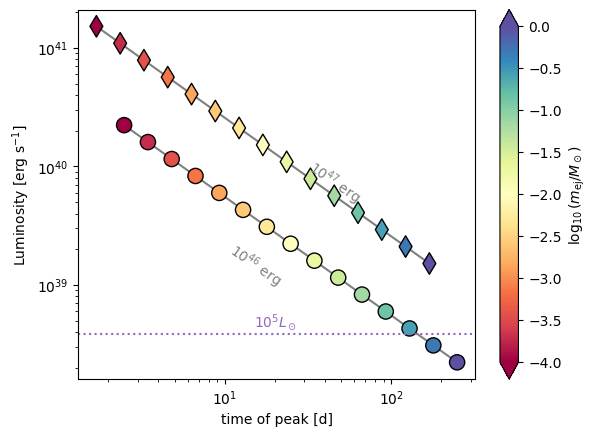

In [3]:
mp = np.logspace(-4,0,15)
lp,tp = Lpl_tpl(1e47,mp,400,0.4,6000)
plt.plot(tp,lp,color='grey',ls='-',zorder=0)
plt.scatter(tp,lp,c=np.log10(mp),cmap='Spectral',s=120,edgecolors='k',marker='d')
plt.colorbar(label=r'$\log_{10}( m_{\rm ej}/M_\odot )$',extend='both')

lp,tp = Lpl_tpl(1e46,mp,400,0.4,6000)
plt.plot(tp,lp,color='grey',ls='-',zorder=0)
plt.scatter(tp,lp,c=np.log10(mp),cmap='Spectral',s=120,edgecolors='k',marker='o')


plt.loglog()
plt.axhline(3.84e33*1e5,color='C4',linestyle=':')
plt.annotate(r'$10^5 L_\odot$',(15,3.84e33*1e5*1.15),color='C4',zorder=0)

plt.xlabel('time of peak [d]')
plt.ylabel('Luminosity [erg s$^{-1}$]')

plt.annotate(r"$10^{46}$ erg",(10,1e39),rotation=-35,color='grey')
plt.annotate(r"$10^{47}$ erg",(30,5e39),rotation=-35,color='grey')


Text(0, 0.5, 'Luminosity [erg s$^{-1}$]')

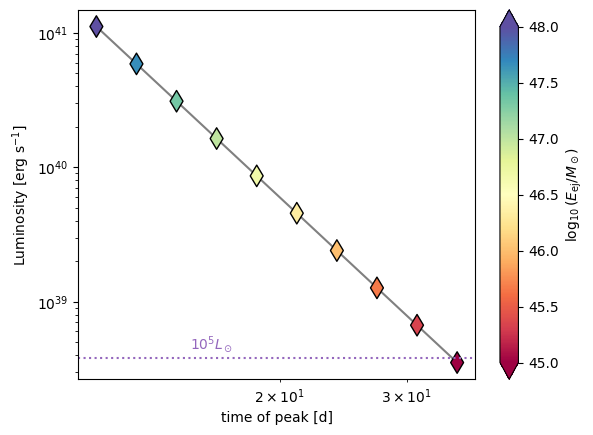

In [4]:
mp = 1e-2
Ep = np.logspace(45,48,10)
lp,tp = Lpl_tpl(Ep,mp,400,0.32,6000)
plt.plot(tp,lp,color='grey',ls='-',zorder=0)
plt.scatter(tp,lp,c=np.log10(Ep),cmap='Spectral',s=120,edgecolors='k',marker='d')
plt.colorbar(label=r'$\log_{10}( E_{\rm ej}/M_\odot )$',extend='both')

plt.loglog()
plt.axhline(3.84e33*1e5,color='C4',linestyle=':')
plt.annotate(r'$10^5 L_\odot$',(15,3.84e33*1e5*1.15),color='C4',zorder=0)

plt.xlabel('time of peak [d]')
plt.ylabel('Luminosity [erg s$^{-1}$]')


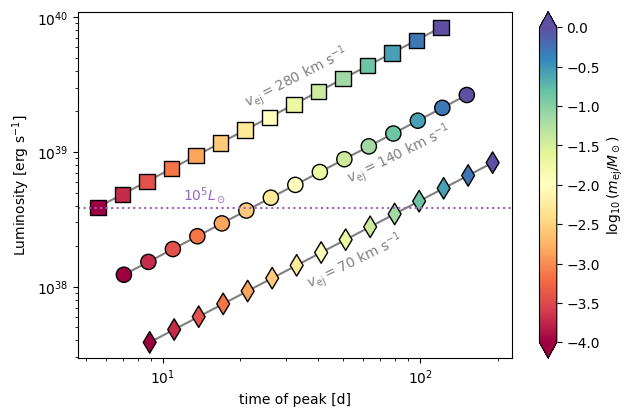

In [142]:
plt.figure(figsize=(7,4.5))
R0 = 400

mp = np.logspace(-4,0,15)
vp = 70*1e5
ep = 0.5*mp*c.msun*vp**2
lp,tp = Lpl_tpl(ep,mp,R0,0.4,6000)
plt.plot(tp,lp,color='grey',ls='-',zorder=0)
plt.scatter(tp,lp,c=np.log10(mp),cmap='Spectral',s=120,edgecolors='k',marker='d')


mp = np.logspace(-4,0,15)
vp = 140*1e5
ep = 0.5*mp*c.msun*vp**2
lp,tp = Lpl_tpl(ep,mp,R0,0.4,6000)
plt.plot(tp,lp,color='grey',ls='-',zorder=0)
plt.scatter(tp,lp,c=np.log10(mp),cmap='Spectral',s=120,edgecolors='k',marker='o')


mp = np.logspace(-4,0,15)
vp = 280*1e5
ep = 0.5*mp*c.msun*vp**2
lp,tp = Lpl_tpl(ep,mp,R0,0.4,6000)
plt.plot(tp,lp,color='grey',ls='-',zorder=0)
plt.scatter(tp,lp,c=np.log10(mp),cmap='Spectral',s=120,edgecolors='k',marker='s')



plt.loglog()
plt.axhline(3.84e33*1e5,color='C4',linestyle=':')
plt.annotate(r'$10^5 L_\odot$',(12,3.84e33*1e5*1.15),color='C4',zorder=0)

plt.xlabel('time of peak [d]')
plt.ylabel('Luminosity [erg s$^{-1}$]')

plt.annotate(r'$v_{\rm ej}=70$ km s$^{-1}$',(35,1e38), rotation=26,color='grey')
plt.annotate(r'$v_{\rm ej}=140$ km s$^{-1}$',(50,6e38), rotation=26,color='grey')
plt.annotate(r'$v_{\rm ej}=280$ km s$^{-1}$',(20,2.2e39), rotation=27,color='grey')

plt.colorbar(label=r'$\log_{10}( m_{\rm ej}/M_\odot )$',extend='both')



# Collapsing profile... 

In [143]:
from astropy.table import Table

def read_MESA_profile_history(mydir,profile_filename):
    p = Table.read(mydir+profile_filename,
          header_start=4,data_start=5,format='ascii')

    print(p.colnames)

    p['dm'] = 10**p['logdq']*p['mass'][0]*c.msun
    p['r'] = 10**p['logR'] * c.rsun

    h = Table.read(mydir+"history.data",
                  header_start=4,data_start=5,format='ascii')
    print(h.colnames)

    print("--------------------------------------------")
    print("mass = ",p['mass'][0])
    print("mass (H-rich) = ", np.sum(p['dm'][p['h1']>0.1]/c.msun ) )
    print("radius = ",10**p['logR'][0])
    print("Teff = ",10**p['logT'][0])
    print("Lum = ",10**p['logL'][0])
    print("vesc(r) = ",np.sqrt(2*c.G*p['mass'][0]*c.msun/(10**p['logR'][0]*c.rsun))/1e5)
    print("--------------------------------------------")
    
    return p,h


def v_r(r_o_R,v0=3e7,alpha=1):
    """ a velocity profile: v=v0*(r/R_*)^alpha """
    return v0*r_o_R**alpha

def add_profile_columns_Eshock_fallback(p,Etot,alpha=1,alpha_acc=0.6):
    """ Add columns associated with extra shock energy and fallback """
    # add a velocity dv = v*(r/R) (Quataert Kasen J1644)
    # normalize to get the total energy

    norm1 = np.sum(0.5*p['dm']*v_r(p['r']/p['r'][0],1,alpha)**2 )
    v0 = np.sqrt(Etot/norm1) 
    
    p['v'] = v_r(p['r']/p['r'][0],v0,alpha)
    p['vesc'] = np.sqrt(2*c.G*p['mass']*c.msun/p['r'])
    p['rt'] = p['r']/(1-(p['v']/p['vesc'])**2)
    p['tff'] = np.pi*np.sqrt(p['r']**3 / (8*c.G*p['mass']*c.msun) )
    p['tff_v']= (1+p['v']/p['vesc'])*np.pi*np.sqrt(p['rt']**3 / (8*c.G*p['mass']*c.msun) )
    
    # freefall accretion rate
    p['mdot_ff'] = c.msun*np.gradient(p['mass'])/np.gradient(p['tff'])
    p['mdot_v'] = c.msun*np.gradient(p['mass'])/np.gradient(p['tff_v'])
    
    # angular momentum and accreted fraction
    p['jrand'] = p['mlt_mixing_length']*p['conv_vel']/np.sqrt(4*np.pi)
    p['jplume'] = p['radius']*c.rsun * p['conv_vel']
    p['jisco_menc'] = 2*c.G*p['mass']*c.msun/c.c
    p['rcirc_over_risco_rand'] = (p['jrand']/p['jisco_menc'])**2
    p['rcirc_over_risco_plume'] = (p['jplume']/p['jisco_menc'])**2
    
    
    HenvConv = (p['jrand']/p['jisco_menc']>1) & (p['h1']>0.1)
    p['frac_accrete_rand'] = np.where(HenvConv,p['rcirc_over_risco_rand']**-alpha_acc, 1)
    HenvConvP = (p['jplume']/p['jisco_menc']>1) & (p['h1']>0.1)
    p['frac_accrete_plume'] = np.where(HenvConvP,p['rcirc_over_risco_plume']**-alpha_acc, 1)

    
    #print('v0=',v0/1e5,"mej=", np.sum(p['dm'][p['rt']<0])/c.msun )
    
def make_HR_plot(p,h):
    plt.scatter(h['log_Teff'],h['log_L'],c=h['total_mass_h1'],vmin=0,vmax=1,cmap='Spectral')
    plt.colorbar(label='H envelope mass ($M_\odot$)',extend='max')
    plt.plot(p['logT'][0],p['logL'][0],'r*',markersize=30,label='model profile')
    plt.xlim(4.6,3.5)
    plt.legend()
    plt.ylabel(r"$\log(L/L_\odot)$")
    plt.xlabel(r"$\log(T_{\rm eff}/{\rm K})$")
    
def make_structure_plot(p):
    plt.figure(figsize=(5,6))

    xmin=-2
    plt.subplot(311)
    plt.plot(p['logR'],p['logRho'],'k-',lw=2)
    sel = p['conv_vel']>0
    plt.plot(p['logR'][sel],p['logRho'][sel],'o',color='DodgerBlue',alpha=1,label='convection')
    #plt.plot(p['logR'],-2*p['logR'])
    plt.xticks(visible=False)
    plt.xlim(xmin,)
    plt.legend(loc='lower left')
    plt.ylabel(r'$\log_{10}(\rho)$ [g cm$^{-3}$]')

    xp = np.linspace(0,1,10)
    plt.plot(xp,-2*xp+1.5,color='grey',ls='-',lw=0.5)
    #plt.plot(xp,-3*xp+1.5,color='grey',ls='-',lw=0.5)
    plt.plot(xp,-4*xp+1.5,color='grey',ls='-',lw=0.5)
    plt.annotate('$r^{-2}$',(1.05,-1),color='grey')
    plt.annotate('$r^{-4}$',(1.05,-3.2),color='grey')


    plt.subplot(312)
    plt.plot(p['logR'],p['h1'],label='H',color='k',lw=2)
    plt.plot(p['logR'],p['he3']+p['he4'],label='He',color='RosyBrown',lw=2)
    plt.plot(p['logR'],p['c12'],label='C',color='SteelBlue',lw=2)
    plt.plot(p['logR'],p['o16'],label='O',color='MediumSeaGreen',lw=2)
    plt.xlim(xmin,)
    plt.ylabel('Abundance')
    plt.legend(loc='upper right')
    plt.xticks(visible=False)

    plt.subplot(313)
    plt.plot(p['logR'],p['mass'],'k-',lw=2)
    plt.axhline(p['mass'][0],ls='--')
    plt.ylim(0,p['mass'][0]*1.05)
    plt.ylabel('enclosed mass [$M_\odot$]')
    plt.xlim(xmin,)


    plt.xlabel(r'$\log_{10}(r/R_\odot)$')
    plt.subplots_adjust(hspace=0.1)
    

def make_structure_plot_Henv(p):
    plt.figure(figsize=(4.5,6))
    
    selh1 = p['h1']>0.1

    xmin=-0.5
    plt.subplot(311)
    plt.plot(p['logR'][selh1],p['logRho'][selh1],'k-',lw=2)
    sel = (p['conv_vel']>0) & selh1
    plt.plot(p['logR'][sel],p['logRho'][sel],'o',color='DodgerBlue',alpha=1,label='convection')
    #plt.plot(p['logR'],-2*p['logR'])
    plt.xticks(visible=False)
    plt.xlim(xmin,)
    plt.legend(loc='lower left')
    plt.ylabel(r'$\log_{10}(\rho)$ [g cm$^{-3}$]')

    xp = np.linspace(0,1,10)
    plt.plot(xp,-2*xp+1.5,color='grey',ls='-',lw=0.5)
    plt.plot(xp,-4*xp+1.5,color='grey',ls='-',lw=0.5)
    plt.annotate('$r^{-2}$',(1.05,-1),color='grey')
    plt.annotate('$r^{-4}$',(1.05,-3.2),color='grey')

    plt.subplot(312)
    plt.plot(p['logR'][selh1],p['mass'][selh1],'k-',lw=2,label=r'$m_{\rm enc}(r)$')
    plt.axhline(p['mass'][0],ls='--',label='$M_*$')
    plt.ylim(0.95*p['mass'][selh1][-1],p['mass'][selh1][0]*1.05)
    plt.ylabel('Mass [$M_\odot$]')
    plt.xlim(xmin,)
    plt.xticks(visible=False)
    plt.legend()
    
    
    plt.subplot(313)
    plt.plot(p['logR'][selh1],p['jrand'][selh1],label='net',color='orchid')
    plt.plot(p['logR'][selh1],p['jplume'][selh1],label='plumes',color='darkslateblue')
    plt.plot(p['logR'][selh1],p['jisco_menc'][selh1],'--',label='ISCO')
    plt.semilogy()
    plt.legend()
    plt.xlim(xmin,)
    plt.ylim(1e16,)
    plt.ylabel('$j$ [cm$^2$ s$^{-1}$]')
    plt.xlabel(r'$\log_{10}(r/R_\odot)$')
    plt.subplots_adjust(hspace=0.075)
    
    

['zone', 'mass', 'logR', 'logT', 'logRho', 'logP', 'x_mass_fraction_H', 'y_mass_fraction_He', 'z_mass_fraction_metals', 'logdq', 'log_g', 'radius', 'pressure_scale_height', 'dq', 'logxq', 'logxm', 'logE', 'logS', 'pgas_div_ptotal', 'eta', 'mu', 'gamma1', 'gamma3', 'csound', 'log_thermal_time_to_surface', 'pp', 'cno', 'tri_alpha', 'h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'log_opacity', 'logL', 'log_L_div_Ledd', 'mlt_mixing_length', 'mlt_mixing_type', 'conv_vel', 'conv_L_div_L', 'conv_vel_div_csound', 'conv_vel_div_L_vel', 'log_mlt_D_mix', 'log_Lconv_div_L', 'mixing_type', 'log_D_mix', 'tau', 'logtau', 'omega', 'i_rot', 'j_rot', 'v_rot', 'w_div_w_crit_roche', 'fp_rot', 'ft_rot', 'ft_rot_div_fp_rot', 'r_e_div_r_p', 'brunt_N', 'lamb_Sl2']
['model_number', 'num_zones', 'star_age', 'log_dt', 'star_mass', 'log_xmstar', 'log_abs_mdot', 'mass_conv_core', 'conv_mx1_top', 'conv_mx1_bot', 'conv_mx2_top', 'conv_mx2_bot', 'mx1_top', 'mx1_bot', 'mx2_top', 'mx2_bot', 'log_LH', 'log_LHe', 'log_LZ', 'lo

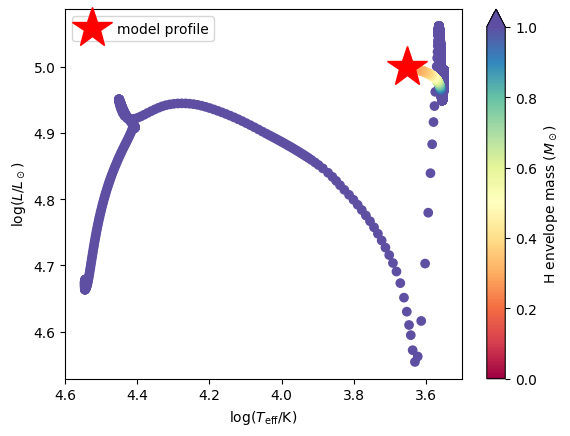

In [145]:
p,h = read_MESA_profile_history("m31_Hpoor/", "profile30.data")
make_HR_plot(p,h)

/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:59: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_rand'] = np.where(HenvConv,p['rcirc_over_risco_rand']**-alpha_acc, 1)
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:61: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_plume'] = np.where(HenvConvP,p['rcirc_over_risco_plume']**-alpha_acc, 1)


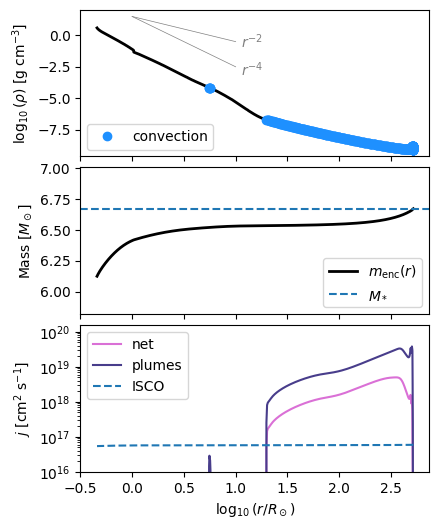

In [146]:
add_profile_columns_Eshock_fallback(p,0)
make_structure_plot_Henv(p)

/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:44: RuntimeWarning: invalid value encountered in sqrt
  p['tff_v']= (1+p['v']/p['vesc'])*np.pi*np.sqrt(p['rt']**3 / (8*c.G*p['mass']*c.msun) )
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:59: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_rand'] = np.where(HenvConv,p['rcirc_over_risco_rand']**-alpha_acc, 1)
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:61: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_plume'] = np.where(HenvConvP,p['rcirc_over_risco_plume']**-alpha_acc, 1)


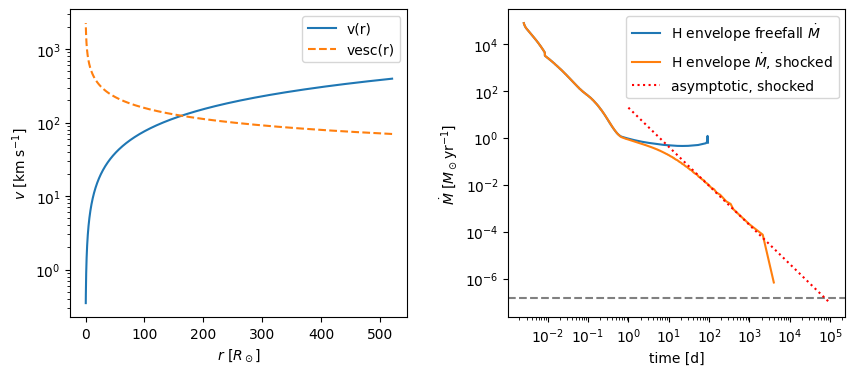

In [147]:
## Add columns for a given shock energy
add_profile_columns_Eshock_fallback(p,Etot=1e47,alpha=1)


# plot velocity profile and fallback
plt.figure(figsize=(10,4))
plt.subplot(121)

# hydrogen envelope
selh1 = p['h1']>0.1

plt.plot(p['r'][selh1]/c.rsun,p['v'][selh1]/1e5,label='v(r)')
plt.plot(p['r'][selh1]/c.rsun,p['vesc'][selh1]/1e5,label='vesc(r)',ls='--')
plt.legend()

plt.semilogy()

plt.ylabel(r'$v$ [km s$^{-1}$]')
plt.xlabel(r'$r$ [$R_\odot$]')


plt.subplot(122)
tscale = 86400
mdscale = c.msun/3.15e7

plt.plot(p['tff'][selh1]/tscale,p['mdot_ff'][selh1]/mdscale,label=r'H envelope freefall $\dot M$')
plt.plot(p['tff_v'][selh1]/tscale,p['mdot_v'][selh1]/mdscale,label=r'H envelope $\dot M$, shocked')

plt.axhline((1.26e38*p['mass'][0] / (0.1*3e10**2)) /mdscale,ls='--',color='grey')
#plt.plot(p['tff_v'][selh1]/tscale,(1.26e38*p['mass'][selh1] / (0.1*3e10**2)) /mdscale, '--',label=r'$\dot M_{\rm Edd}$' )


# asymptotic fallback
ind = np.argmax(p['rt'])
mdnorm = 2/3*np.pi*p['r'][ind]**2 * 10**p['logRho'][ind] *p['vesc'][ind] / mdscale
tnorm = p['tff'][ind]

xp = np.logspace(0,5)*86400
plt.plot(xp/tscale, mdnorm*(xp/tnorm)**(-5/3),'r:',label='asymptotic, shocked' )

plt.legend(loc='upper right')
plt.loglog()
plt.xlabel('time [d]')
plt.ylabel(r'$\dot M \ [M_\odot {\rm yr}^{-1}]$')

plt.subplots_adjust(wspace=0.3)

Text(0.5, 0, '$\\log_{10}(r/R_\\odot)$')

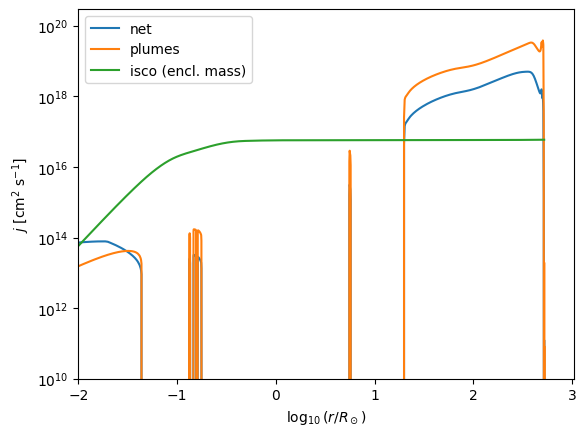

In [148]:
plt.plot(p['logR'],p['jrand'],label='net')
plt.plot(p['logR'],p['jplume'],label='plumes')
plt.plot(p['logR'],p['jisco_menc'],label='isco (encl. mass)')
plt.semilogy()
plt.legend()
plt.xlim(-2,)
plt.ylim(1e10,)
plt.ylabel('$j$ [cm$^2$ s$^{-1}$]')
plt.xlabel(r'$\log_{10}(r/R_\odot)$')

Text(0.5, 0, '$r \\  [R_\\odot]$')

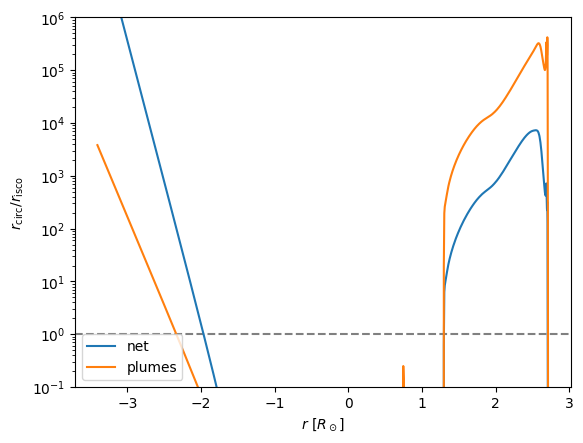

In [149]:
plt.axhline(1,color='grey',ls='--')

plt.plot(p['logR'],p['rcirc_over_risco_rand'],label='net')
plt.plot(p['logR'],p['rcirc_over_risco_plume'],label='plumes')
plt.semilogy()
plt.legend(loc='lower left')
#plt.xlim(1,)
plt.ylim(0.1,1e6)
plt.ylabel(r'$r_{\rm circ}/r_{\rm isco}$')
plt.xlabel(r'$r \  [R_\odot]$')

total mass =  6.670439813040088 msun
frac accreted (plumes): 0.98008063129784
mass  accreted: 6.537568862998574
frac not accreted: 0.019919368702160045
mass not accreted: 0.1328709500415129


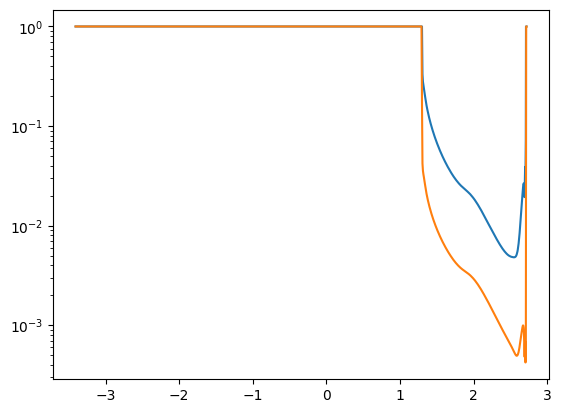

In [150]:
plt.plot(p['logR'],p['frac_accrete_rand'],label='net')
plt.plot(p['logR'],p['frac_accrete_plume'],label='plumes')
plt.semilogy()

print("total mass = ",np.sum(p['dm'])/c.msun, "msun")
print("frac accreted (plumes):", np.sum(p['frac_accrete_plume']*p['dm'])/np.sum(p['dm']) )
print("mass  accreted:", (np.sum(p['frac_accrete_plume']*p['dm']))/c.msun)
print("frac not accreted:", 1-np.sum(p['frac_accrete_plume']*p['dm'])/np.sum(p['dm']))
print("mass not accreted:", (np.sum(p['dm'])-np.sum(p['frac_accrete_plume']*p['dm']))/c.msun)

<Figure size 400x500 with 0 Axes>

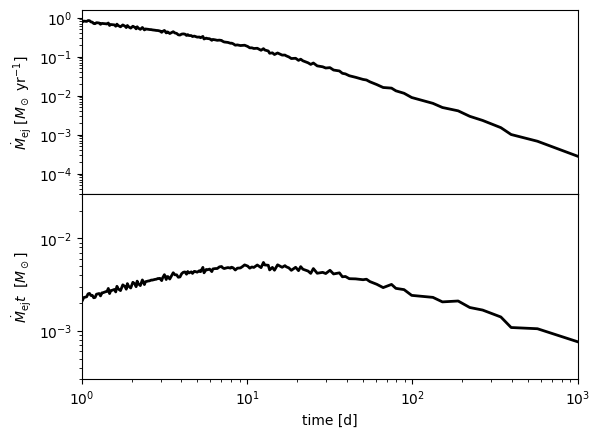

In [151]:
from astropy.convolution import convolve, Gaussian1DKernel,Box1DKernel

p['mdot_ej'] = -p['dm']*(1-p['frac_accrete_plume'])/ np.gradient(p['tff_v'])

myk = Box1DKernel(5)

plt.figure(figsize=(4,5))
plt.subplots(ncols=1,nrows=2)
plt.subplot(211)
sel = (p['frac_accrete_plume']<1.0) & (p['h1']>0.1)
plt.loglog( p['tff_v'][sel]/86400. , convolve(p['mdot_ej'][sel],myk )     /(c.msun/c.yr),color='k',lw=2) 
plt.xlim(1,1e3)
plt.xticks(visible=False)
plt.ylabel(r'$\dot M_{\rm ej} $ [$M_\odot$ yr$^{-1}$]')

plt.subplot(212)
sel = (p['frac_accrete_plume']<1.0) & (p['h1']>0.1)
plt.loglog( p['tff_v'][sel]/86400. , convolve(p['mdot_ej'][sel],myk )  * p['tff_v'][sel]   /c.msun,color='k',lw=2) 
plt.xlim(1,1e3)
plt.xlabel('time [d]')
plt.ylabel(r'$ \dot M_{\rm ej} t $  [$M_\odot$]')
plt.ylim(3e-4,3e-2)

plt.subplots_adjust(hspace=0)
plt.savefig("Figs/mdot_ejected.pdf")


# Compare the H rich and H poor

['zone', 'mass', 'logR', 'logT', 'logRho', 'logP', 'x_mass_fraction_H', 'y_mass_fraction_He', 'z_mass_fraction_metals', 'logdq', 'log_g', 'radius', 'pressure_scale_height', 'dq', 'logxq', 'logxm', 'logE', 'logS', 'pgas_div_ptotal', 'eta', 'mu', 'gamma1', 'gamma3', 'csound', 'log_thermal_time_to_surface', 'pp', 'cno', 'tri_alpha', 'h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'log_opacity', 'logL', 'log_L_div_Ledd', 'mlt_mixing_length', 'mlt_mixing_type', 'conv_vel', 'conv_L_div_L', 'conv_vel_div_csound', 'conv_vel_div_L_vel', 'log_mlt_D_mix', 'log_Lconv_div_L', 'mixing_type', 'log_D_mix', 'tau', 'logtau', 'omega', 'i_rot', 'j_rot', 'v_rot', 'w_div_w_crit_roche', 'fp_rot', 'ft_rot', 'ft_rot_div_fp_rot', 'r_e_div_r_p', 'brunt_N', 'lamb_Sl2']
['model_number', 'num_zones', 'star_age', 'log_dt', 'star_mass', 'log_xmstar', 'log_abs_mdot', 'mass_conv_core', 'conv_mx1_top', 'conv_mx1_bot', 'conv_mx2_top', 'conv_mx2_bot', 'mx1_top', 'mx1_bot', 'mx2_top', 'mx2_bot', 'log_LH', 'log_LHe', 'log_LZ', 'lo

(3.5, 5.5)

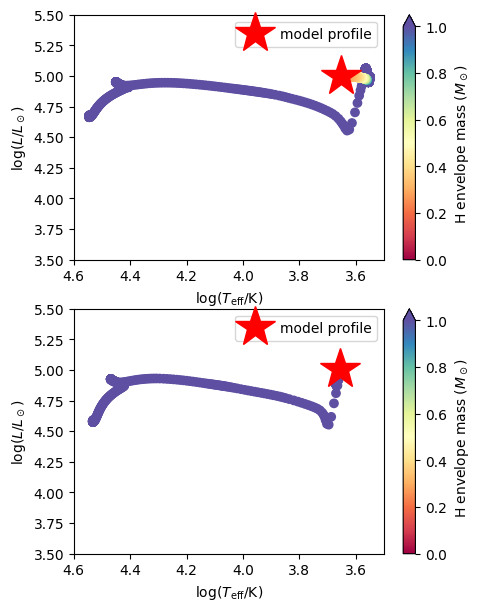

In [152]:
pp,hp = read_MESA_profile_history("m31_Hpoor/", "profile30.data")
pr,hr = read_MESA_profile_history("m31_Hrich/", "profile7.data")


plt.figure(figsize=(5,7))
plt.subplot(211)
make_HR_plot(pp,hp)
plt.ylim(3.5,5.5)

plt.subplot(212)
make_HR_plot(pr,hr)
plt.ylim(3.5,5.5)

/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:59: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_rand'] = np.where(HenvConv,p['rcirc_over_risco_rand']**-alpha_acc, 1)
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:61: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_plume'] = np.where(HenvConvP,p['rcirc_over_risco_plume']**-alpha_acc, 1)


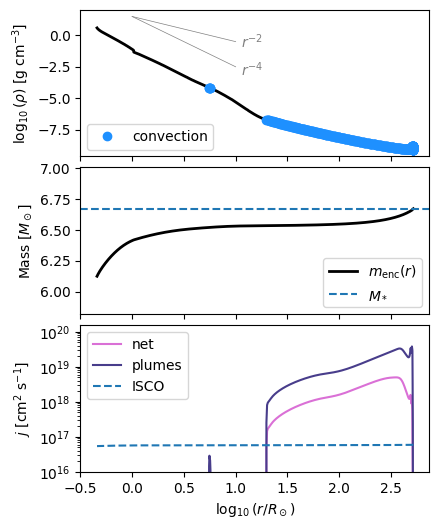

In [153]:
# H poor
add_profile_columns_Eshock_fallback(pp,0)
make_structure_plot_Henv(pp)
plt.savefig("Figs/profile_hpoor.pdf",bbox_inches='tight')

/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:59: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_rand'] = np.where(HenvConv,p['rcirc_over_risco_rand']**-alpha_acc, 1)
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:61: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_plume'] = np.where(HenvConvP,p['rcirc_over_risco_plume']**-alpha_acc, 1)


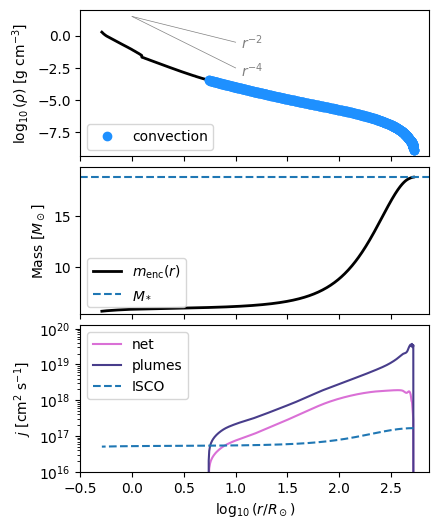

In [154]:
# H rich
add_profile_columns_Eshock_fallback(pr,0)
make_structure_plot_Henv(pr)
plt.savefig("Figs/profile_hrich.pdf",bbox_inches='tight')

['zone', 'mass', 'logR', 'logT', 'logRho', 'logP', 'x_mass_fraction_H', 'y_mass_fraction_He', 'z_mass_fraction_metals', 'logdq', 'log_g', 'radius', 'pressure_scale_height', 'dq', 'logxq', 'logxm', 'logE', 'logS', 'pgas_div_ptotal', 'eta', 'mu', 'gamma1', 'gamma3', 'csound', 'log_thermal_time_to_surface', 'pp', 'cno', 'tri_alpha', 'h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'log_opacity', 'logL', 'log_L_div_Ledd', 'mlt_mixing_length', 'mlt_mixing_type', 'conv_vel', 'conv_L_div_L', 'conv_vel_div_csound', 'conv_vel_div_L_vel', 'log_mlt_D_mix', 'log_Lconv_div_L', 'mixing_type', 'log_D_mix', 'tau', 'logtau', 'omega', 'i_rot', 'j_rot', 'v_rot', 'w_div_w_crit_roche', 'fp_rot', 'ft_rot', 'ft_rot_div_fp_rot', 'r_e_div_r_p', 'brunt_N', 'lamb_Sl2']
['model_number', 'num_zones', 'star_age', 'log_dt', 'star_mass', 'log_xmstar', 'log_abs_mdot', 'mass_conv_core', 'conv_mx1_top', 'conv_mx1_bot', 'conv_mx2_top', 'conv_mx2_bot', 'mx1_top', 'mx1_bot', 'mx2_top', 'mx2_bot', 'log_LH', 'log_LHe', 'log_LZ', 'lo

/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:59: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_rand'] = np.where(HenvConv,p['rcirc_over_risco_rand']**-alpha_acc, 1)
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:61: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_plume'] = np.where(HenvConvP,p['rcirc_over_risco_plume']**-alpha_acc, 1)
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:44: RuntimeWarning: invalid value encountered in sqrt
  p['tff_v']= (1+p['v']/p['vesc'])*np.pi*np.sqrt(p['rt']**3 / (8*c.G*p['mass']*c.msun) )


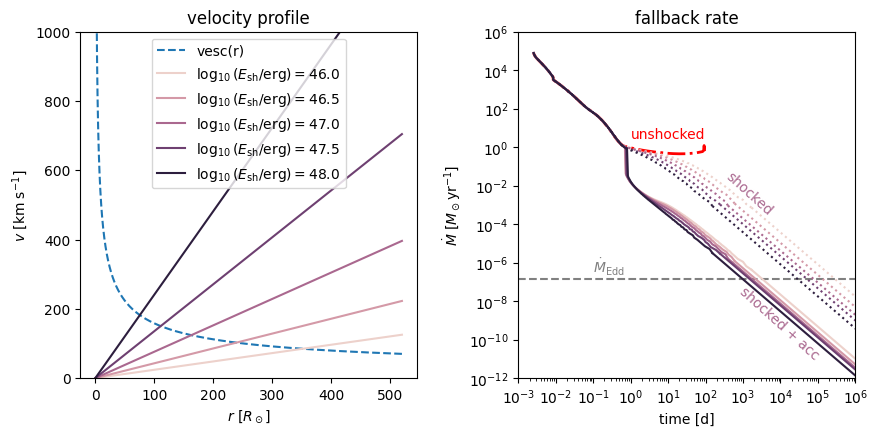

In [155]:
import seaborn as sns

p,h = read_MESA_profile_history("m31_Hpoor/", "profile30.data")
add_profile_columns_Eshock_fallback(p,Etot=0)


# Same thing with a range of shock energies... 

# add a velocity dv = v*(r/R) (Quataert Kasen J1644)
# normalize to get the total energy
alpha=1
# hydrogen envelope
selh1 = p['h1']>0.1

tscale = 86400
mdscale = c.msun/3.15e7

plt.figure(figsize=(10,4.5))
plt.subplot(121)

def v_r(r_o_R,v0=3e7,alpha=1):
    #return v0*(np.exp(r_o_R**alpha)-1)
    return v0*r_o_R**alpha

NE=5
Elist = np.logspace(46,48,NE)
mycolors = sns.cubehelix_palette(NE,start=0)


plt.plot(p['r'][selh1]/c.rsun,p['vesc'][selh1]/1e5,label='vesc(r)',ls='--')
plt.title('velocity profile')
plt.ylabel(r'$v$ [km s$^{-1}$]')
plt.xlabel(r'$r$ [$R_\odot$]')
for i,Etot in enumerate(Elist):
    add_profile_columns_Eshock_fallback(p,Etot=Etot,alpha=alpha)
    plt.plot(p['r'][selh1]/c.rsun,p['v'][selh1]/1e5,
             label=r'$\log_{10}(E_{\rm sh} / {\rm erg})=$'+str(np.round(np.log10(Etot),1)) ,color=mycolors[i])

    
plt.legend()
plt.ylim(0,1000)


offset=5
plt.subplot(122)
plt.title('fallback rate')
plt.plot(p['tff'][selh1]/tscale,p['mdot_ff'][selh1]/mdscale,color='r',lw=2,ls="-.")
for i,Etot in enumerate(Elist):
    add_profile_columns_Eshock_fallback(p,Etot=Etot,alpha=alpha)
    ind = np.argmax(p['rt'])
    
    plt.plot(p['tff_v'][selh1][ind+offset:]/tscale,p['mdot_v'][selh1][ind+offset:]/mdscale,color=mycolors[i],ls=':')
    plt.plot(p['tff_v'][selh1][ind+offset:]/tscale,(p['mdot_v']*p['frac_accrete_plume'])[selh1][ind+offset:]/mdscale,color=mycolors[i])

    mdnormf = (p['mdot_v']*p['frac_accrete_plume'])[ind+offset]
    mdnorm = (p['mdot_v'])[ind+offset]
    tnorm = p['tff_v'][ind+offset]
    
    tfactor = np.logspace(0,5)
    plt.plot(tfactor*tnorm/tscale,mdnormf/mdscale*(tfactor)**(-5/3.),color=mycolors[i],ls='-')
    plt.plot(tfactor*tnorm/tscale,mdnorm/mdscale*(tfactor)**(-5/3.),color=mycolors[i],ls=':')
    
    
plt.axhline((1.26e38*p['mass'][0] / (0.1*c.c**2)) /mdscale, ls='--',color='grey',zorder=0)
plt.annotate(r'$\dot M_{\rm Edd}$',(0.1,3e-7),color='grey')
plt.annotate('unshocked',(1,3),color='r')
plt.annotate('shocked',(300,3e-4),color=mycolors[2],rotation=-42)
plt.annotate('shocked + acc',(7e2,1e-11),color=mycolors[2],rotation=-42)

plt.xlim(1e-3,1e6)
plt.ylim(1e-12,1e6)

plt.loglog()
plt.xlabel('time [d]')
plt.ylabel(r'$\dot M \ [M_\odot {\rm yr}^{-1}]$')

plt.subplots_adjust(wspace=0.3)

plt.savefig('Figs/Shock_velocity_fallback_model.pdf',bbox_inches='tight')


/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:44: RuntimeWarning: invalid value encountered in sqrt
  p['tff_v']= (1+p['v']/p['vesc'])*np.pi*np.sqrt(p['rt']**3 / (8*c.G*p['mass']*c.msun) )
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:59: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_rand'] = np.where(HenvConv,p['rcirc_over_risco_rand']**-alpha_acc, 1)
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:61: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_plume'] = np.where(HenvConvP,p['rcirc_over_risco_plume']**-alpha_acc, 1)


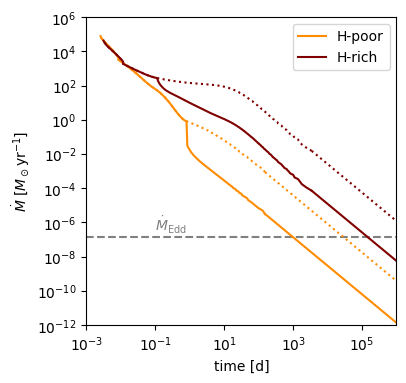

In [156]:
def fallback_plot(p,label='',color='DodgerBlue'):
    tscale = 86400
    mdscale = c.msun/3.15e7
    # hydrogen envelope
    selh1 = p['h1']>0.1

    ind = np.argmax(p['rt'])
    
    if ind>0:
        plt.plot(p['tff_v'][selh1][ind+offset:]/tscale,p['mdot_v'][selh1][ind+offset:]/mdscale,color=color,ls=':')
        plt.plot(p['tff_v'][selh1][ind+offset:]/tscale,(p['mdot_v']*p['frac_accrete_plume'])[selh1][ind+offset:]/mdscale,color=color,label=label)

        mdnormf = (p['mdot_v']*p['frac_accrete_plume'])[ind+offset]
        mdnorm = (p['mdot_v'])[ind+offset]
        tnorm = p['tff_v'][ind+offset]

        tfactor = np.logspace(0,5)
        plt.plot(tfactor*tnorm/tscale,mdnormf/mdscale*(tfactor)**(-5/3.),color=color,ls='-')
        plt.plot(tfactor*tnorm/tscale,mdnorm/mdscale*(tfactor)**(-5/3.),color=color,ls=':')

        
    #plt.legend(loc='lower left')
    plt.loglog()
    plt.xlabel('time [d]')
    plt.ylabel(r'$\dot M \ [M_\odot {\rm yr}^{-1}]$')

    

    

## Add columns for a given shock energy
plt.figure(figsize=(4,4))
plt.axhline((1.26e38*pp['mass'][0] / (0.1*c.c**2)) /mdscale, ls='--',color='grey',zorder=0)

myE = 1e48
add_profile_columns_Eshock_fallback(pp,Etot=myE,alpha=1)
fallback_plot(pp,color='DarkOrange',label='H-poor')

add_profile_columns_Eshock_fallback(pr,Etot=myE,alpha=1)
fallback_plot(pr,color='Maroon',label='H-rich')

plt.xlim(1e-3,1e6)
plt.ylim(1e-12,1e6)
plt.annotate(r'$\dot M_{\rm Edd}$',(0.1,3e-7),color='grey')
plt.legend()

plt.savefig("Figs/mdot_Hrichpoor.pdf",bbox_inches='tight')


/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:44: RuntimeWarning: invalid value encountered in sqrt
  p['tff_v']= (1+p['v']/p['vesc'])*np.pi*np.sqrt(p['rt']**3 / (8*c.G*p['mass']*c.msun) )
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:59: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_rand'] = np.where(HenvConv,p['rcirc_over_risco_rand']**-alpha_acc, 1)
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:61: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_plume'] = np.where(HenvConvP,p['rcirc_over_risco_plume']**-alpha_acc, 1)
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/315682405.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  vej=np.sqrt(2*Etot/mej)


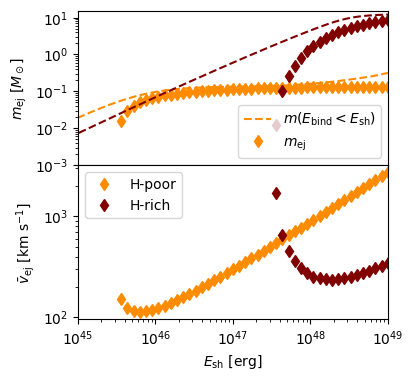

In [157]:
# How much mass is ejected? 
Elist = np.logspace(45,49,51)


def dm_vej_plot(p,color='DodgerBlue',label='',do_upper_label=False):
    selh1 = p['h1']>0.1
    alpha = 1
    dmlist = []
    vlist = []
    for Etot in Elist:
        add_profile_columns_Eshock_fallback(p,Etot=Etot,alpha=alpha)
        mej = np.sum(p['dm'][p['rt']<0])
        vej=np.sqrt(2*Etot/mej)
        dmlist.append(mej/c.msun)
        vlist.append(vej)


    Ebind = (c.G*p['mass']*(p['mass'][0]-p['mass'])*c.msun**2/p['r'])[selh1]
    dM = (p['mass'][0]-p['mass'])[selh1]
    
    plt.subplot(211)
    if do_upper_label:
        plt.plot(Ebind,dM,'--',color=color ,label=r'$m ( E_{\rm bind}<E_{\rm sh})$')
        plt.plot(Elist,dmlist,'d',color=color,label=r'$m_{\rm ej}$')
    else:
        plt.plot(Ebind,dM,'--',color=color )
        plt.plot(Elist,dmlist,'d',color=color)

    plt.loglog()

    plt.ylabel(r'$m_{\rm ej} \ [M_\odot]$ ')
    #plt.xlabel(r"$E_{\rm sh}$ [erg]" )
    plt.xlim(1.e45,1e49)
    plt.ylim(1e-3,15)
    plt.legend()
    plt.xticks(visible=False)
    
    
    plt.subplot(212)

    plt.plot(Elist,np.array(vlist)/1e5,'d',color=color,label=label)

    plt.xlabel(r"$E_{\rm sh}$ [erg]" )
    plt.ylabel(r'$\bar v_{\rm ej} \ [{\rm km \ s}^{-1}]$ ')
    plt.loglog()
    plt.xlim(1.e45,1e49)
    plt.legend()
    plt.subplots_adjust(hspace=0.)
    
    
plt.figure(figsize=(4,4))
myE = 1e48
add_profile_columns_Eshock_fallback(pp,Etot=myE,alpha=1)
add_profile_columns_Eshock_fallback(pr,Etot=myE,alpha=1)


dm_vej_plot(pp,color='DarkOrange',label='H-poor',do_upper_label=True)
dm_vej_plot(pr,color='Maroon',label='H-rich')
plt.savefig("Figs/mdot_DMVrichpoor.pdf",bbox_inches='tight')

/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:59: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_rand'] = np.where(HenvConv,p['rcirc_over_risco_rand']**-alpha_acc, 1)
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:61: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_plume'] = np.where(HenvConvP,p['rcirc_over_risco_plume']**-alpha_acc, 1)
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/3083827214.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  vej=np.sqrt(2*Etot/mej)
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:44: RuntimeWarning: invalid value encountered in sqrt
  p['tff_v']= (1+p['v']/p['vesc'])*np.pi*np.sqrt(p['rt']**3 / (8*c.G*p['mass']*c.msun) )
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/3152497294.py:11: RuntimeWarning: divide by zero encountered in power
  Lpl = 1.2e42*E51**(5/6)

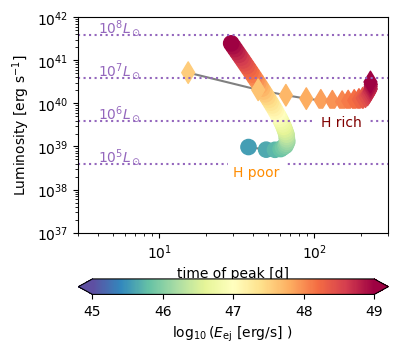

In [158]:
## Given an ejecta mass and mean velocity, plot the luminosity
def Lt_dmvej_plot(p,marker='o'):
    selh1 = p['h1']>0.1
    alpha = 1
    dmlist = []
    vlist = []
    for Etot in Elist:
        add_profile_columns_Eshock_fallback(p,Etot=Etot,alpha=alpha)
        mej = np.sum(p['dm'][p['rt']<0])
        vej=np.sqrt(2*Etot/mej)
        dmlist.append(mej/c.msun)
        vlist.append(vej)


    
    R0 = 10**p['logR'][0]

    lp,tp = Lpl_tpl(np.array(Elist),np.array(dmlist),R0,0.32,6000)
    plt.plot(tp,lp,color='grey',ls='-',zorder=0)
    plt.scatter(tp,lp,c=np.log10(Elist),cmap='Spectral_r',s=120,marker=marker,vmin=45,vmax=49)
    
    plt.xlabel('time of peak [d]')
    plt.ylabel('Luminosity [erg s$^{-1}$]')
    plt.ylim(1e37,1e42)
    plt.xlim(3,300)

    
plt.figure(figsize=(4,4))
Lt_dmvej_plot(pp,marker='o')
Lt_dmvej_plot(pr,marker='d')   
cb=plt.colorbar(label=r'$\log_{10}( E_{\rm ej}\ {\rm [erg/s]}\ )$ ',extend='both',orientation='horizontal')
cb.solids.set_rasterized(True)

plt.loglog()
plt.axhline(3.84e33*1e5,color='C4',linestyle=':')
plt.annotate(r'$10^5 L_\odot$',(4,3.84e33*1e5*1.15),color='C4',zorder=0)

plt.axhline(3.84e33*1e6,color='C4',linestyle=':')
plt.annotate(r'$10^6 L_\odot$',(4,3.84e33*1e6*1.15),color='C4',zorder=0)

plt.axhline(3.84e33*1e7,color='C4',linestyle=':')
plt.annotate(r'$10^7 L_\odot$',(4,3.84e33*1e7*1.15),color='C4',zorder=0)

plt.axhline(3.84e33*1e8,color='C4',linestyle=':')
plt.annotate(r'$10^8 L_\odot$',(4,3.84e33*1e8*1.15),color='C4',zorder=0)


plt.annotate('H poor',(30,2e38),color='DarkOrange',backgroundcolor='w')
plt.annotate('H rich',(110,3e39),color='Maroon',backgroundcolor='w')

plt.savefig("Figs/LT_DMV.pdf",bbox_inches='tight')

/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:44: RuntimeWarning: invalid value encountered in sqrt
  p['tff_v']= (1+p['v']/p['vesc'])*np.pi*np.sqrt(p['rt']**3 / (8*c.G*p['mass']*c.msun) )
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:59: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_rand'] = np.where(HenvConv,p['rcirc_over_risco_rand']**-alpha_acc, 1)
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:61: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_plume'] = np.where(HenvConvP,p['rcirc_over_risco_plume']**-alpha_acc, 1)
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/643604780.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  plt.plot(xp/tscale, mdnorm*(xp/tnorm)**(-5/3),'r:',label='asymptotic, shocked',color=col

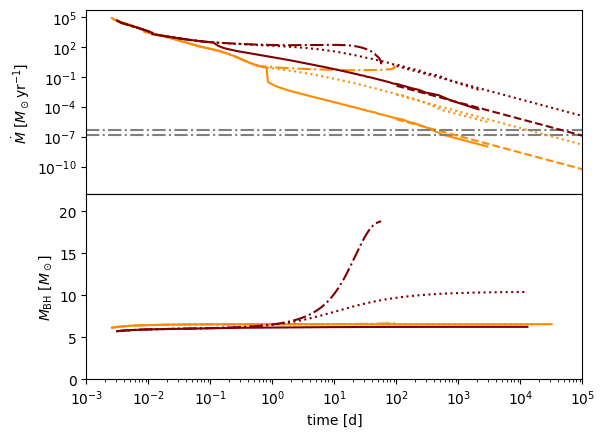

In [159]:
def fallback_plot_variations(p,color='DodgerBlue'):
    #plt.figure(figsize=(6,6))
    plt.subplot(211)
    tscale = 86400
    mdscale = c.msun/3.15e7
    # hydrogen envelope
    selh1 = p['h1']>0.1

    plt.plot(p['tff'][selh1]/tscale,p['mdot_ff'][selh1]/mdscale,ls='-.',label=r'H envelope freefall $\dot M$',color=color)
    plt.plot(p['tff_v'][selh1]/tscale,p['mdot_v'][selh1]/mdscale,ls=':',label=r'H envelope $\dot M$, shocked',color=color)
    plt.plot(p['tff_v'][selh1]/tscale,(p['mdot_v']*p['frac_accrete_plume'])[selh1]/mdscale,label=r'H envelope $\dot M$, shocked',color=color)

    
    
    plt.axhline((1.26e38*p['mass'][0] / (0.1*3e10**2)) /mdscale,ls='-.',color='grey')
    #plt.axhline((1.26e38*p['mass'][0] / (0.001*3e10**2)) /mdscale,ls='-.',color='grey')

    
    # asymptotic fallback
    ind = np.argmax(p['rt'])
    if(ind>0):
        mdnorm = 2/3*np.pi*p['r'][ind]**2 * 10**p['logRho'][ind] *p['vesc'][ind] / mdscale 
        mdnorm_f = mdnorm * p['frac_accrete_plume'][ind]
        tnorm = p['tff'][ind]

        xp = np.logspace(2,6)*86400
        plt.plot(xp/tscale, mdnorm*(xp/tnorm)**(-5/3),'r:',label='asymptotic, shocked',color=color )
        plt.plot(xp/tscale, mdnorm_f*(xp/tnorm)**(-5/3),'r--',label='asymptotic, shocked',color=color )

    #plt.legend(loc='lower left')
    plt.loglog()
    plt.xlabel('time [d]')
    plt.ylabel(r'$\dot M \ [M_\odot {\rm yr}^{-1}]$')
    plt.xlim(1e-3,1e5)
    plt.xticks(visible=False)

    
    plt.subplot(212)
    m_inner = p['mass'][selh1][-1]
    plt.plot(np.flipud(p['tff'][selh1]/tscale),m_inner + np.cumsum(np.flipud(p['dm'][selh1]))/c.msun,ls='-.',label=r'H envelope freefall $\Delta M$',color=color)
    plt.plot(np.flipud(p['tff_v'][selh1]/tscale),m_inner + np.cumsum(np.flipud(p['dm'][selh1]))/c.msun,ls=':',label=r'H envelope $\Delta M$, shocked',color=color)
    plt.plot(np.flipud(p['tff_v'][selh1]/tscale),m_inner +  np.cumsum(np.flipud(p['dm'][selh1]*p['frac_accrete_plume'][selh1]))/c.msun,label=r'H envelope $\Delta M$, shocked',color=color)
    #plt.plot(np.flipud(p['tff_v'][selh1]/tscale),p['mass'][0] - (m_inner +  np.cumsum(np.flipud(p['dm'][selh1]*p['frac_accrete_plume'][selh1]))/c.msun),label=r'H envelope ejected',color='DodgerBlue')
    plt.semilogx()
    plt.xlabel('time [d]')
    plt.ylabel(r'$M_{\rm BH} \ [M_\odot]$')
    plt.xlim(1e-3,1e5)
    
    #plt.plot(np.flipud(p['tff_v'][selh1]/tscale),p['mass'][0] - (m_inner +  np.cumsum(np.flipud(p['dm'][selh1]*p['frac_accrete_plume'][selh1]))/c.msun),label=r'H envelope ejected',color='DodgerBlue')
    #plt.loglog()
    #plt.xlabel('time [d]')
    #plt.ylabel(r'$m_{\rm env, ej} \ [M_\odot]$')
    
    plt.subplots_adjust(hspace=0)
    plt.ylim(0,22)


myE = 1e48
add_profile_columns_Eshock_fallback(pp,Etot=myE,alpha=1,alpha_acc=0.6)
fallback_plot_variations(pp,color='DarkOrange')

add_profile_columns_Eshock_fallback(pp,Etot=myE,alpha=1,alpha_acc=0.6)
fallback_plot_variations(pr,color='Maroon')




/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:44: RuntimeWarning: invalid value encountered in sqrt
  p['tff_v']= (1+p['v']/p['vesc'])*np.pi*np.sqrt(p['rt']**3 / (8*c.G*p['mass']*c.msun) )
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:59: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_rand'] = np.where(HenvConv,p['rcirc_over_risco_rand']**-alpha_acc, 1)
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:61: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_plume'] = np.where(HenvConvP,p['rcirc_over_risco_plume']**-alpha_acc, 1)


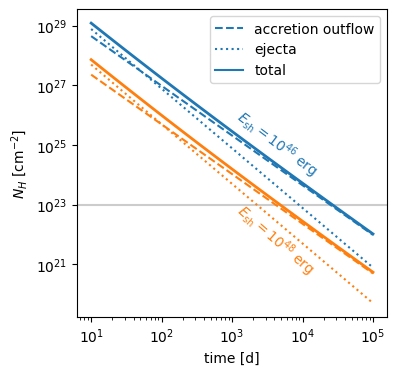

In [160]:
def NH_ej(p,tt): 
    if type(tt)==float:
        tt = np.array([tt])
    else:
        tt = np.array(tt)
    
    nhs = np.zeros_like(tt)
    for i,t in enumerate(tt):
        selej = p['v']>p['vesc']
        sigma_ej = np.sum( (p['dm']/(4*np.pi*(p['v']*t)**2))[selej] ) 
        nhs[i] = sigma_ej/c.mp

    return nhs


def NH_wind(p,t):
    ind = np.argmax(p['rt'])
    rpl = 10**p['logR'][ind] * c.rsun
    vpl = np.sqrt(2*c.G*p['mass'][ind]*c.msun / rpl)
    
    mdnorm = 2/3*np.pi*p['r'][ind]**2 * 10**p['logRho'][ind] *p['vesc'][ind] 
    mdnorm_outf = mdnorm * (1-p['frac_accrete_plume'][ind])
    tnorm = p['tff'][ind]

    md_out = mdnorm_outf * (t/tnorm)**(-5/3)

    return md_out/(4*np.pi*rpl*vpl) / c.mp


tt = np.logspace(1,5,100)

EL = [1e46,1e48]
colors = ['C0','C1']


plt.figure(figsize=(4,4))
for i,myE in enumerate(EL):
    add_profile_columns_Eshock_fallback(pp,Etot=myE,alpha=1,alpha_acc=0.6)
   
    plt.loglog(tt,NH_ej(pp,tt*86400),ls=':',color=colors[i])
    plt.loglog(tt,NH_wind(pp,tt*86400),ls='--',color=colors[i])
    plt.loglog(tt,NH_ej(pp,tt*86400)+NH_wind(pp,tt*86400),color=colors[i],lw=2)
    
    

plt.xlabel('time [d]')
plt.ylabel(r'$N_H$ [cm$^{-2}$]')

plt.plot(0,0,ls='--',label='accretion outflow',color=colors[0])
plt.plot(0,0,ls=':',label='ejecta',color=colors[0])
plt.plot(0,0,ls='-',label='total',color=colors[0])

plt.annotate(r'$E_{\rm sh}=10^{46}$ erg',(1e3,0.1e25),color=colors[0],rotation=-37)
plt.annotate(r'$E_{\rm sh}=10^{48}$ erg',(1e3,0.5e21),color=colors[1],rotation=-41)


plt.legend(loc='upper right')

plt.axhline(1e23,color='0.8',ls='-',zorder=0)

plt.savefig("Figs/NH.pdf",bbox_inches='tight')

Text(0.5, 0, '$r$ [AU]')

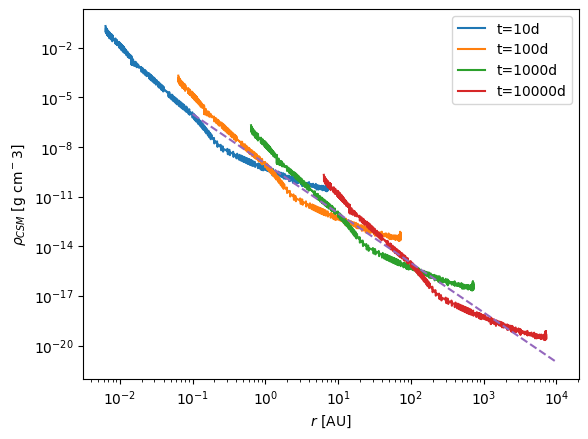

In [161]:
def r_csm_t(p,t):
    return p['v']*t

def rho_csm_t(p,t,skip=10):
    r = r_csm_t(p,t)
    dr = np.gradient(-p['v'])*t    
    return p['dm']/(4*np.pi*r**2 * dr)



selh1 = pp['h1']>0.1
tl = [1e1,1e2,1e3,1e4]
for myt in tl:
    myt*=86400.
    plt.loglog(r_csm_t(pp[selh1],myt)/c.au,rho_csm_t(pp[selh1],myt),label='t='+str(int(myt/86400.))+'d')

plt.legend()
xp=np.logspace(-1,4) # au 
plt.plot(xp,1e-9*xp**-3,'--')
plt.ylabel(r'$\rho_{CSM}$ [g cm$^-3$]')
plt.xlabel(r'$r$ [AU]')

In [162]:
# typical shell mass in msun  -- this is the simplest... 
1e-9*50**-3 * 4*np.pi*(50*c.au)**3  / c.msun * 1e-2 

0.0002115289733097588

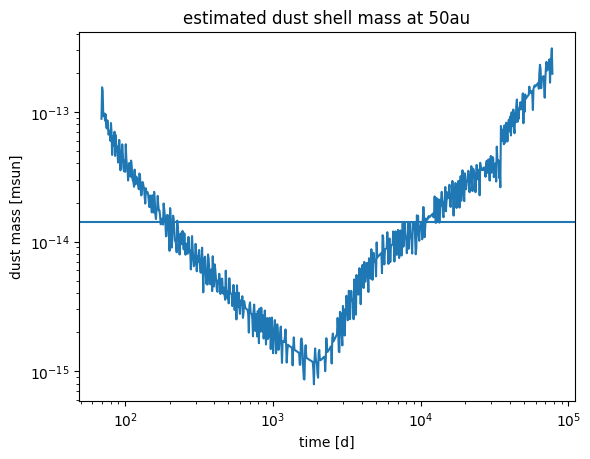

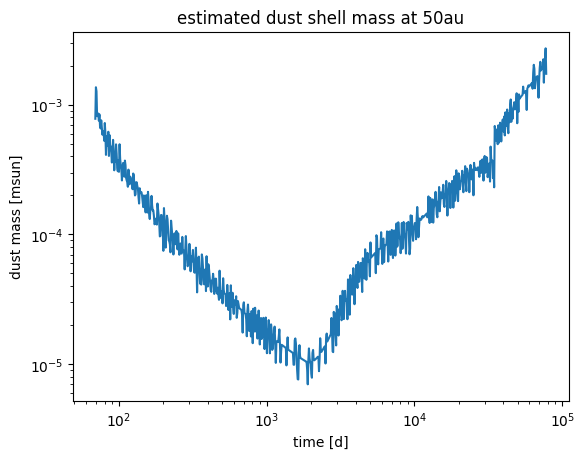

In [163]:
tl = np.logspace(1,5,1000)*86400
rho50 = np.zeros_like(tl)
mshell=np.zeros_like(tl)

for i,myt in enumerate(tl):
    rho50[i] = np.interp(50,np.flipud(r_csm_t(pp[selh1],myt)/c.au),np.flipud(rho_csm_t(pp[selh1],myt)),left=np.nan,right=np.nan )
    mshell[i] = 4/3*np.pi*(50*c.au)**3 * rho50[i]


# reference density estimate 
plt.axhline( 0.1*c.msun/(4/3*np.pi*(100*c.au)**3)  )

plt.loglog(tl/86400, rho50 )
plt.title('estimated dust shell mass at 50au')
plt.xlabel('time [d]')
plt.ylabel('dust mass [msun]')
plt.show() 
    

plt.loglog(tl/86400,mshell/c.msun * 1e-2)
plt.title('estimated dust shell mass at 50au')
plt.xlabel('time [d]')
plt.ylabel('dust mass [msun]')
plt.show()

# NGC 6946 progenitor

['zone', 'mass', 'logR', 'logT', 'logRho', 'logP', 'x_mass_fraction_H', 'y_mass_fraction_He', 'z_mass_fraction_metals', 'logdq', 'log_g', 'radius', 'pressure_scale_height', 'dq', 'logxq', 'logxm', 'logE', 'logS', 'pgas_div_ptotal', 'eta', 'mu', 'gamma1', 'gamma3', 'csound', 'log_thermal_time_to_surface', 'pp', 'cno', 'tri_alpha', 'h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'log_opacity', 'logL', 'log_L_div_Ledd', 'mlt_mixing_length', 'mlt_mixing_type', 'conv_vel', 'conv_L_div_L', 'conv_vel_div_csound', 'conv_vel_div_L_vel', 'log_mlt_D_mix', 'log_Lconv_div_L', 'mixing_type', 'log_D_mix', 'tau', 'logtau', 'omega', 'i_rot', 'j_rot', 'v_rot', 'w_div_w_crit_roche', 'fp_rot', 'ft_rot', 'ft_rot_div_fp_rot', 'r_e_div_r_p', 'brunt_N', 'lamb_Sl2']
['model_number', 'num_zones', 'star_age', 'log_dt', 'star_mass', 'log_xmstar', 'log_abs_mdot', 'mass_conv_core', 'conv_mx1_top', 'conv_mx1_bot', 'conv_mx2_top', 'conv_mx2_bot', 'mx1_top', 'mx1_bot', 'mx2_top', 'mx2_bot', 'log_LH', 'log_LHe', 'log_LZ', 'lo

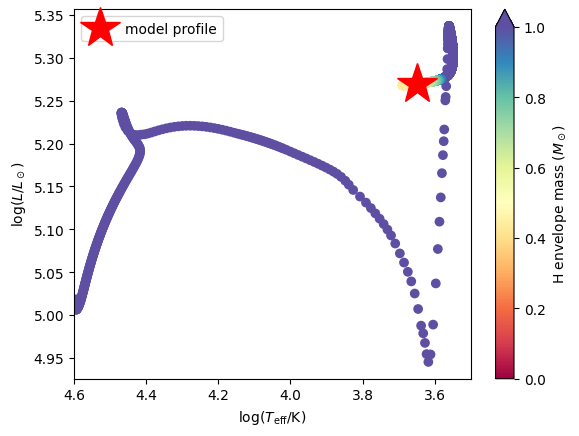

In [164]:
p,h = read_MESA_profile_history("ngc6946_Hpoor/LOGS/", "profile27.data")
make_HR_plot(p,h)
print("log L = ",p['logL'][0])
print("H envelope = ",np.sum(p['dq'][p['h1']>0.1])*p['mass'][0])

/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:59: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_rand'] = np.where(HenvConv,p['rcirc_over_risco_rand']**-alpha_acc, 1)
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:61: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_plume'] = np.where(HenvConvP,p['rcirc_over_risco_plume']**-alpha_acc, 1)


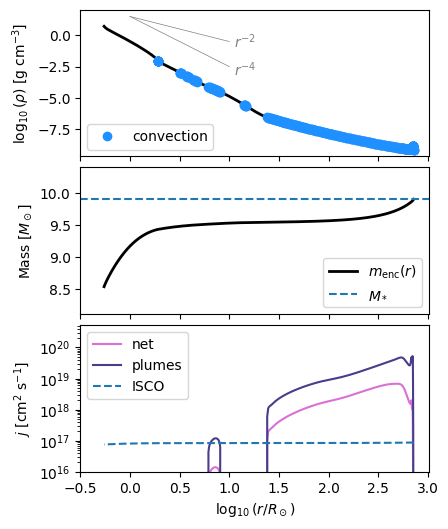

In [165]:
add_profile_columns_Eshock_fallback(p,0)
make_structure_plot_Henv(p)
plt.savefig("Figs/profile_ngc6946.pdf",bbox_inches='tight')

/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:59: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_rand'] = np.where(HenvConv,p['rcirc_over_risco_rand']**-alpha_acc, 1)
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:61: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_plume'] = np.where(HenvConvP,p['rcirc_over_risco_plume']**-alpha_acc, 1)
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/315682405.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  vej=np.sqrt(2*Etot/mej)
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:44: RuntimeWarning: invalid value encountered in sqrt
  p['tff_v']= (1+p['v']/p['vesc'])*np.pi*np.sqrt(p['rt']**3 / (8*c.G*p['mass']*c.msun) )


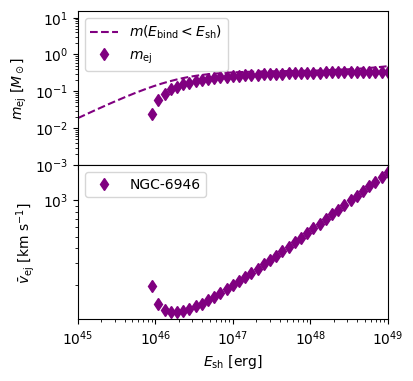

In [166]:
plt.figure(figsize=(4,4))

dm_vej_plot(p,color='Purple',label='NGC-6946',do_upper_label=True)

/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:59: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_rand'] = np.where(HenvConv,p['rcirc_over_risco_rand']**-alpha_acc, 1)
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:61: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_plume'] = np.where(HenvConvP,p['rcirc_over_risco_plume']**-alpha_acc, 1)
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/3083827214.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  vej=np.sqrt(2*Etot/mej)
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:44: RuntimeWarning: invalid value encountered in sqrt
  p['tff_v']= (1+p['v']/p['vesc'])*np.pi*np.sqrt(p['rt']**3 / (8*c.G*p['mass']*c.msun) )
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/3152497294.py:11: RuntimeWarning: divide by zero encountered in power
  Lpl = 1.2e42*E51**(5/6)

Text(70, 1e+41, 'NGC6946')

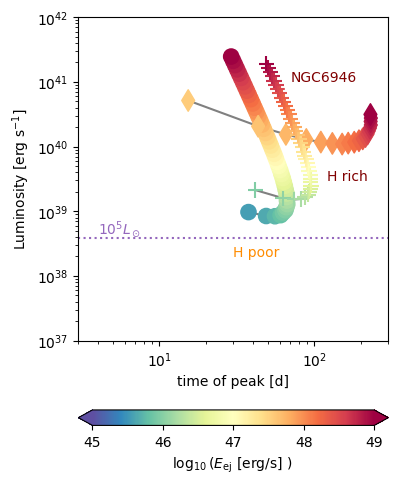

In [167]:
plt.figure(figsize=(4,6))
Lt_dmvej_plot(pp,marker='o')
Lt_dmvej_plot(pr,marker='d')
Lt_dmvej_plot(p,marker='+')
cb=plt.colorbar(label=r'$\log_{10}( E_{\rm ej}\ {\rm [erg/s]}\ )$ ',extend='both',orientation='horizontal')
cb.solids.set_rasterized(True)

plt.loglog()
plt.axhline(3.84e33*1e5,color='C4',linestyle=':')
plt.annotate(r'$10^5 L_\odot$',(4,3.84e33*1e5*1.15),color='C4',zorder=0)

plt.annotate('H poor',(30,2e38),color='DarkOrange',backgroundcolor='w')
plt.annotate('H rich',(120,3e39),color='Maroon',backgroundcolor='w')
plt.annotate('NGC6946',(70,1e41),color='Maroon',backgroundcolor='w')


/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:44: RuntimeWarning: invalid value encountered in sqrt
  p['tff_v']= (1+p['v']/p['vesc'])*np.pi*np.sqrt(p['rt']**3 / (8*c.G*p['mass']*c.msun) )
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:59: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_rand'] = np.where(HenvConv,p['rcirc_over_risco_rand']**-alpha_acc, 1)
/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/2555492010.py:61: RuntimeWarning: divide by zero encountered in power
  p['frac_accrete_plume'] = np.where(HenvConvP,p['rcirc_over_risco_plume']**-alpha_acc, 1)


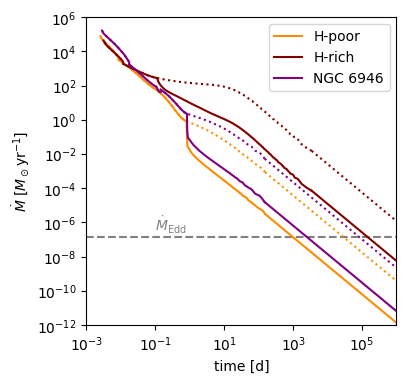

In [168]:
## Add columns for a given shock energy
plt.figure(figsize=(4,4))
plt.axhline((1.26e38*pp['mass'][0] / (0.1*c.c**2)) /mdscale, ls='--',color='grey',zorder=0)

myE = 1e48
add_profile_columns_Eshock_fallback(pp,Etot=myE,alpha=1)
fallback_plot(pp,color='DarkOrange',label='H-poor')

add_profile_columns_Eshock_fallback(pr,Etot=myE,alpha=1)
fallback_plot(pr,color='Maroon',label='H-rich')

add_profile_columns_Eshock_fallback(p,Etot=myE,alpha=1)
fallback_plot(p,color='Purple',label='NGC 6946')

plt.xlim(1e-3,1e6)
plt.ylim(1e-12,1e6)
plt.annotate(r'$\dot M_{\rm Edd}$',(0.1,3e-7),color='grey')
plt.legend()



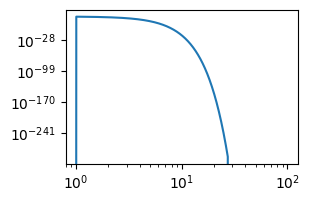

In [175]:
def dmdv(v,vesc):
    return np.where(v>vesc, np.exp(-(v/vesc)**2 ), 0)


vesc = np.sqrt( 2* c.G*pp['mass'][0]*c.msun/(pp['radius'][0]*c.rsun))
vi = np.logspace(0,2,1000)*vesc

mtot = 0.3*c.msun
norm = np.sum( dmdv(vi,vesc) * np.gradient(vi) )
mi = mtot * dmdv(vi,vesc)  / norm

plt.figure(figsize=(3,2))
plt.loglog(vi/vesc,mi)
plt.show()



/var/folders/42/xrxtlygd0wz0ycr_y5yb1m_40000gn/T/ipykernel_95695/914717298.py:9: RuntimeWarning: divide by zero encountered in divide
  return normC * 0.5*np.sqrt(np.pi)*vesc * ( erf(rmax/(vesc*t)) - erf(rmin/(vesc*t)) )


[]

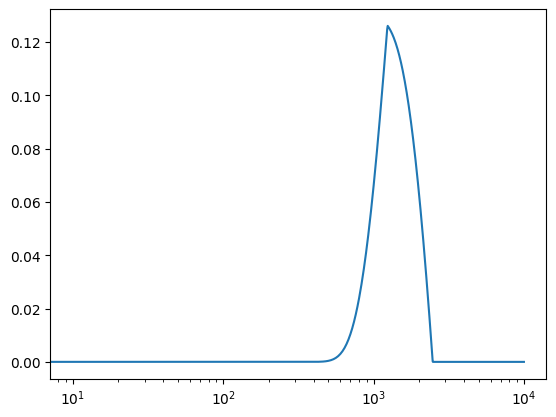

In [180]:
from scipy.special import erf


def mshell(t,rmin,rmax,vesc,mtot):
    # integral of exp(-x^2) from 1 to infity (approx by 10..), gives ~0.139
    normC = mtot / ( vesc * 0.5*np.sqrt(np.pi)*(erf(10)-erf(1)) )
    rmin = np.where(rmin<vesc*t,vesc*t,rmin)
    rmax = np.where(rmax>rmin,rmax,rmin)
    return normC * 0.5*np.sqrt(np.pi)*vesc * ( erf(rmax/(vesc*t)) - erf(rmin/(vesc*t)) )  


tl = np.linspace(0,1e4,1000)
plt.plot(tl,mshell(tl*86400 ,50*c.au,100*c.au,70e5,0.13*c.msun)/c.msun  )
plt.semilogx()
plt.plot()


